In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
whole_data = pd.read_csv("Real estate.csv")
data = whole_data.sample(frac=0.7, random_state=42)
data.reset_index(drop=True, inplace=True)
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,359,2013.167,1.1,193.5845,6,24.96571,121.54089,45.1
1,351,2013.000,13.2,492.2313,5,24.96515,121.53737,42.3
2,374,2013.083,0.0,274.0144,1,24.97480,121.53059,52.2
3,400,2012.917,12.7,170.1289,1,24.97371,121.52984,37.3
4,370,2012.667,20.2,2185.1280,3,24.96322,121.51237,22.8


In [6]:
data.shape

(290, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      290 non-null    int64  
 1   X1 transaction date                     290 non-null    float64
 2   X2 house age                            290 non-null    float64
 3   X3 distance to the nearest MRT station  290 non-null    float64
 4   X4 number of convenience stores         290 non-null    int64  
 5   X5 latitude                             290 non-null    float64
 6   X6 longitude                            290 non-null    float64
 7   Y house price of unit area              290 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 18.2 KB


In [10]:
data = data.drop(["No"], axis=1)
data.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000
mean,2013.133355,17.873448,1105.855772,4.103448,24.968524,121.533250,37.590690
std,0.282571,11.485451,1297.540448,2.914524,0.012537,0.015620,12.775499
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.750000,289.324800,1.000000,24.962990,121.528153,27.700000
50%,2013.125000,15.800000,492.231300,4.000000,24.970170,121.538870,38.100000
75%,2013.417000,28.350000,1479.850500,6.000000,24.977180,121.543438,46.350000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,78.300000


In [12]:
data.shape

(290, 7)

In [20]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [21]:
label_data = data.copy()
label_encoder = LabelEncoder()
object_cols = ["X1 transaction date", "X2 house age", "X3 distance to the nearest MRT station"]
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,6,2,26,6,24.96571,121.54089,45.1
1,4,61,92,5,24.96515,121.53737,42.3
2,5,0,37,1,24.97480,121.53059,52.2
3,3,56,18,1,24.97371,121.52984,37.3
4,0,106,167,3,24.96322,121.51237,22.8


<Axes: >

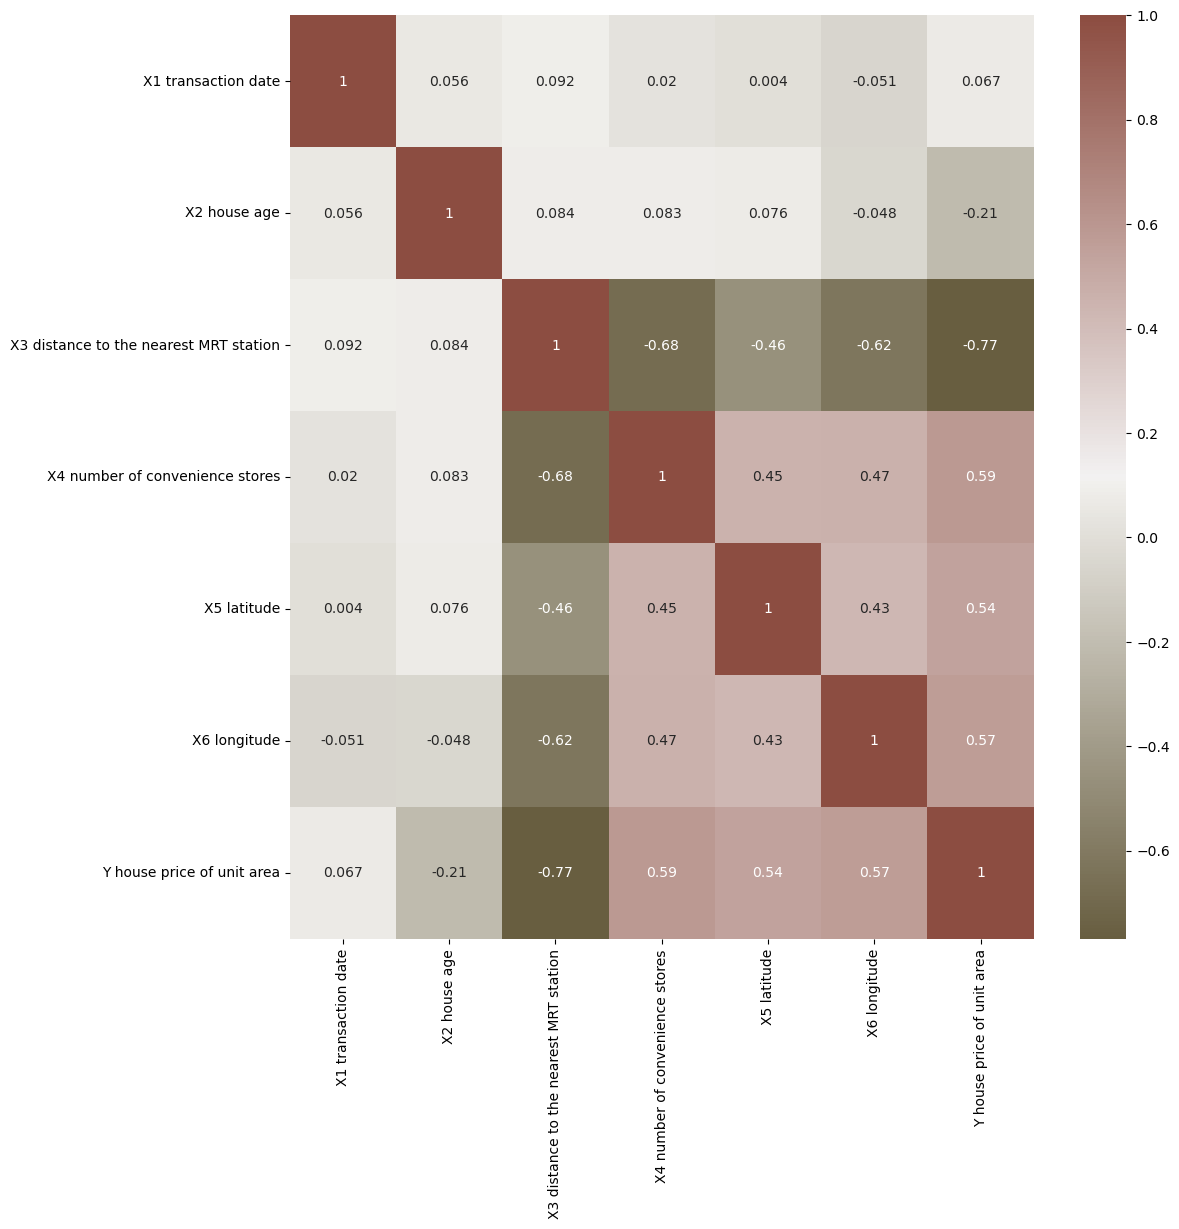

In [22]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [23]:
X= label_data.drop(["X6 longitude"],axis =1)
y= label_data["X6 longitude"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [24]:
pipeline_rf = make_pipeline(StandardScaler(), RandomForestRegressor())

In [25]:
param_distributions = {
    'randomforestregressor__n_estimators': [100, 200, 300],
    'randomforestregressor__max_depth': [None, 10, 20, 30],
    'randomforestregressor__min_samples_split': [2, 5, 10],
    'randomforestregressor__min_samples_leaf': [1, 2, 4],
    'randomforestregressor__bootstrap': [True, False]
}

In [26]:
random_search = RandomizedSearchCV(pipeline_rf, param_distributions, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

In [27]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('randomforestregressor',
                                              RandomForestRegressor())]),
                   n_jobs=-1,
                   param_distributions={'randomforestregressor__bootstrap': [True,
                                                                             False],
                                        'randomforestregressor__max_depth': [None,
                                                                             10,
                                                                             20,
                                                                             30],
                                        'randomforestregressor__min_samples_leaf': [1,
                                                                                    2,
                                                                                    4],
                                        'randomforestregressor__min_samples_split': [2,
                                                                                     5,
                                                                                     10],
                                        'randomforestregressor__n_estimators': [100,
                                                                                200,
                                                                                300]},
                   random_state=42, scoring='neg_mean_squared_error')

In [28]:
best_params_rf = random_search.best_params_
best_model_rf = random_search.best_estimator_

In [29]:
rf_pred = best_model_rf.predict(X_test)

In [30]:
metrics.mean_squared_error(y_test, rf_pred)

3.5319506408710395e-05

In [31]:
param_distributions = {
    'xgbregressor__n_estimators': [100, 200, 300],
    'xgbregressor__max_depth': [3, 4, 5],
    'xgbregressor__learning_rate': [0.01, 0.05, 0.1],
    'xgbregressor__min_child_weight': [1, 3, 5],
    'xgbregressor__gamma': [0, 0.1, 0.3],
    'xgbregressor__subsample': [0.6, 0.8, 1.0],
    'xgbregressor__colsample_bytree': [0.6, 0.8, 1.0]
}

In [32]:
pipeline_xgb = make_pipeline(StandardScaler(), XGBRegressor())

In [33]:
random_search = RandomizedSearchCV(pipeline_xgb, param_distributions, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

In [34]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('xgbregressor',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           device=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
                                                           feature_types=None,
                                                           gamma=None,
                                                           grow_policy=N...
                   param_distributions={'xgbregressor__colsample_bytree': [0.6,
                                                                           0.8,
                                                                           1.0],
                                        'xgbregressor__gamma': [0, 0.1, 0.3],
                                        'xgbregressor__learning_rate': [0.01,
                                                                        0.05,
                                                                        0.1],
                                        'xgbregressor__max_depth': [3, 4, 5],
                                        'xgbregressor__min_child_weight': [1, 3,
                                                                           5],
                                        'xgbregressor__n_estimators': [100, 200,
                                                                       300],
                                        'xgbregressor__subsample': [0.6, 0.8,
                                                                    1.0]},
                   random_state=42, scoring='neg_mean_squared_error')

In [35]:
best_params_xgb = random_search.best_params_
best_model_xgb = random_search.best_estimator_

In [36]:
xgb_pred = best_model_xgb.predict(X_test)

In [37]:
metrics.mean_squared_error(y_test, xgb_pred)

4.0601528524063016e-05

In [38]:
print("R^2:",metrics.r2_score(y_test, xgb_pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, xgb_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, xgb_pred))
print("MSE:",metrics.mean_squared_error(y_test, xgb_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))

R^2: 0.8588635400952824
Adjusted R^2: 0.8460329528312172
MAE: 0.003820005050032135
MSE: 4.0601528524063016e-05
RMSE: 0.006371932871904962
